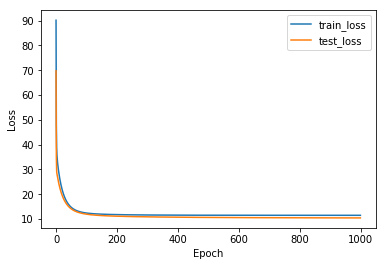

minimal train loss:  11.4968753689
minimal test loss:  10.4454852119


In [4]:
# write your code here
from sklearn import datasets, model_selection
import numpy as np
from scipy.sparse import csr_matrix, hstack

def data_loader(file):
    inputs,labels = datasets.load_svmlight_file(file)
    one = np.ones((inputs.shape[0],1))
    inputs = hstack( [inputs, csr_matrix(one)] ).toarray()
    labels = np.array(labels).reshape(inputs.shape[0],1)
    return inputs, labels

def train(X, Y, theta, learning_rate=0.001):
    gradient = np.dot(X.transpose(), X.dot(theta) - Y )
    theta -= learning_rate * gradient
    return theta

def loss_function(X_test, Y_test, theta):
    Y_prediction = X_test.dot(theta)
    loss = 0.5/X_test.shape[0] * np.dot((Y_test - Y_prediction).transpose(), (Y_test - Y_prediction) ).sum()
    return loss

def plot_loss(train_loss,test_loss):
    import matplotlib.pyplot as plt
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(train_loss, label="train_loss")
    plt.plot(test_loss, label="test_loss")
    plt.legend(loc='upper right')
    plt.show()

def main(learning_rate=0.001, epoch=1000):
    X, y = data_loader('housing.txt')
    theta = np.zeros((X.shape[1], 1))
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
    train_loss = []
    test_loss = []
    for episode in range(epoch):
        theta = train(X_train, y_train, theta, learning_rate)

        loss = loss_function(X_train, y_train, theta)
        train_loss.append(loss)
        
        loss = loss_function(X_test, y_test, theta)
        test_loss.append(loss)
    plot_loss(train_loss,test_loss)
    print("minimal train loss: ", min(train_loss))
    print("minimal test loss: ", min(test_loss))

if __name__ =="__main__":
    main(learning_rate=0.00035, epoch=1000)